In [1]:
# !pip install ultralytics

- https://docs.ultralytics.com/datasets/detect/coco8/#usage

In [2]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# fix for Jupyter notebook
%matplotlib inline

In [3]:
# Plot results image
def printYOLO(results):
    # Initialize a figure for plotting
    plt.figure(figsize=(10, 10))

    # Process results list
    for i, result in enumerate(results):
        # assuming plot() method returns a numpy array in BGR format
        bgr_array = result.plot()

        # Convert BGR to RGB
        rgb_array = bgr_array[:, :, ::-1]

        # Convert numpy array to PIL Image
        img = Image.fromarray(rgb_array)

        # Add a subplot for each image
        ax = plt.subplot(len(results), 1, i + 1)
        ax.imshow(img)
        ax.axis('off')  # Hide axes

    plt.tight_layout()
    plt.show()

- https://docs.ultralytics.com/tasks/detect/#models

In [4]:
model = YOLO("yolov8n.pt")

In [5]:
# Train the model
results = model.train(data='coco8.yaml', epochs=3, imgsz=640)

Ultralytics YOLOv8.1.5 🚀 Python-3.10.6 torch-2.2.2+cu121 CPU (Intel Core(TM) i7-8565U 1.80GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco8.yaml, epochs=3, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train16, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tr

train: Scanning /mnt/c/Users/hl2/work_doc/code/git/CookbookPyCode/image_processing/datasets/coco8/labels/train.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]
val: Scanning /mnt/c/Users/hl2/work_doc/code/git/CookbookPyCode/image_processing/datasets/coco8/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]


Plotting labels to runs/detect/train16/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train16
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G     0.9795      3.465      1.357         32        640: 100%|██████████| 1/1 [00:01<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

                   all          4         17      0.902      0.518      0.727      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G      1.362      2.845      1.662         22        640: 100%|██████████| 1/1 [00:01<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all          4         17      0.906      0.524      0.738      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G      1.294      3.584      1.698         17        640: 100%|██████████| 1/1 [00:01<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all          4         17      0.907      0.525      0.729       0.52



3 epochs completed in 0.003 hours.
Optimizer stripped from runs/detect/train16/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train16/weights/best.pt, 6.5MB

Validating runs/detect/train16/weights/best.pt...
Ultralytics YOLOv8.1.5 🚀 Python-3.10.6 torch-2.2.2+cu121 CPU (Intel Core(TM) i7-8565U 1.80GHz)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]


                   all          4         17      0.907      0.525      0.743      0.527
                person          4         10       0.94        0.3      0.502      0.236
                   dog          4          1          1          0      0.332      0.189
                 horse          4          2          1      0.852      0.995      0.747
              elephant          4          2          1          0      0.638        0.2
              umbrella          4          1      0.759          1      0.995      0.895
          potted plant          4          1      0.745          1      0.995      0.895
Speed: 1.4ms preprocess, 89.9ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/train16


In [6]:
# validation = model.val()

## Plot

In [7]:
view_images = [
    'datasets/coco8/images/val/000000000036.jpg',
    'datasets/coco8/images/val/000000000042.jpg'
]
predictions = model.predict(view_images)


0: 640x640 1 person, 1 umbrella, 1: 640x640 2 suitcases, 188.0ms
Speed: 1.7ms preprocess, 94.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


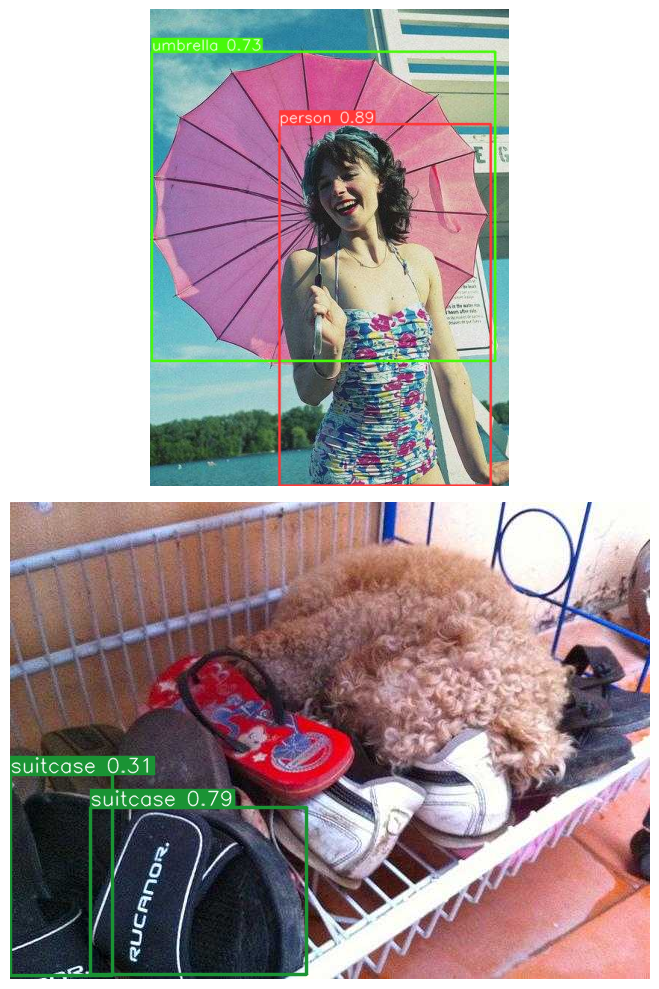

In [8]:
printYOLO(predictions)